In [1]:
import graphviz
from tabulate import tabulate
from IPython.display import display, Image

In [2]:
class DFA:
    def __init__(self, states, alphabet, transitions, start_state, accept_states):
        self.states = states
        self.alphabet = alphabet
        self.transitions = transitions
        self.start_state = start_state
        self.accept_states = accept_states

    def process_input(self, input_string):
        current_state = self.start_state
        for symbol in input_string:
            current_state = self.transitions.get((current_state, symbol), None)
            if current_state is None:
                return False
        return current_state in self.accept_states

    def generate_state_table(self):
        headers = ['State'] + list(self.alphabet) + ['Accepting']
        rows = []

        for state in self.states:
            row = [state]
            for symbol in self.alphabet:
                next_state = self.transitions.get((state, symbol), None)
                row.append(next_state)
            row.append('Yes' if state in self.accept_states else 'No')
            rows.append(row)

        return tabulate(rows, headers=headers, tablefmt='grid')

In [3]:

def visualize_dfa(dfa):
    dot = graphviz.Digraph('DFA', format='png')
    dot.attr(rankdir='LR')

    for state in dfa.states:
        dot.node(state, shape='doublecircle' if state in dfa.accept_states else 'circle')

    for transition, next_state in dfa.transitions.items():
        dot.edge(transition[0], next_state, label=transition[1])

    dot.render('dfa', format='png', cleanup=True)
    file_path = "dfa"
    png_file_path = f"{file_path}.png"
    display(Image(filename=png_file_path))
    print("DFA visualization saved as 'dfa.png'")


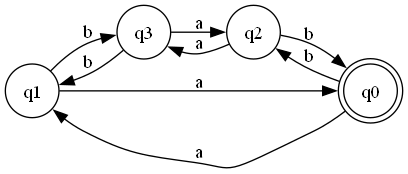

DFA visualization saved as 'dfa.png'

State Table:
+---------+-----+-----+-------------+
| State   | b   | a   | Accepting   |
+=========+=====+=====+=============+
| q1      | q3  | q0  | No          |
+---------+-----+-----+-------------+
| q3      | q1  | q2  | No          |
+---------+-----+-----+-------------+
| q0      | q2  | q1  | Yes         |
+---------+-----+-----+-------------+
| q2      | q0  | q3  | No          |
+---------+-----+-----+-------------+
The DFA accepts the input string 'aabb'


In [4]:

# Example DFA for the language of strings ending with 'ab'
states = {'q0', 'q1', 'q2','q3'}
alphabet = {'a', 'b'}
transitions = {('q0', 'a'): 'q1', ('q0', 'b'): 'q2', ('q1', 'a'): 'q0', ('q1', 'b'): 'q3', ('q2', 'a'): 'q3', ('q2', 'b'): 'q0',('q3', 'a'): 'q2',('q3', 'b'): 'q1'}
start_state = 'q0'
accept_states = {'q0'}

dfa_example = DFA(states, alphabet, transitions, start_state, accept_states)

# Visualize the DFA
visualize_dfa(dfa_example)

# Generate and print the state table
state_table = dfa_example.generate_state_table()
print("\nState Table:")
print(state_table)

input_string = 'aabb'
result = dfa_example.process_input(input_string)
print(f"The DFA {'accepts' if result else 'rejects'} the input string '{input_string}'")